In [1]:
import pandas as pd 

In [2]:
def report(df):
    column_names = df.columns.to_list()
    row = df.iloc[0]
    for i in range(0,len(column_names)):
        print(column_names[i],':',row[i])

#### Загрузка таблицы спама

In [3]:
spam = pd.read_csv("5204_spam.csv",';')
spam.fillna(0, inplace=True)

#### Загрузка данных

In [4]:
df = pd.read_csv("5204_hm.csv",';')
df.fillna(0, inplace=True)

report(df)

id : 14781131
date : 17.07.2020 8:00:37
Hour : 8
Minute : 0.0
second : 37.0
phone : 9164375204
ttl : bidlist*a1594962030521b1594962034167c1594962034167d1594972834850e1594972836084f1594962037037g1594962037037h1594962035534i1594962035576j1594972837053


#### Определим время жизни пакетов

In [5]:
def get_len(last_string):
    splitters = ['*','a','b','c','d','e','f','g','h','i','j']
    ttl = []
    for splitter in splitters:
        new_string = last_string.split(splitter)
        last_string = new_string[1]
        ttl.append(new_string[0])
    ttl.append(last_string)
    first_value = int(ttl[2])
    last_value = int(ttl[-2:][0])
    return last_value-first_value

df['dev_len']=df['ttl'].apply(get_len)

report(df)

id : 14781131
date : 17.07.2020 8:00:37
Hour : 8
Minute : 0.0
second : 37.0
phone : 9164375204
ttl : bidlist*a1594962030521b1594962034167c1594962034167d1594972834850e1594972836084f1594962037037g1594962037037h1594962035534i1594962035576j1594972837053
dev_len : 5055


#### Возьмем запись с минимальной длительностью в мс

In [6]:
minimal_rec = df.sort_values(by=['dev_len']).iloc[0]
minimal_rec['dev_len']

1010

#### Выделим функцию

In [7]:
def get_func(last_string):
    return last_string.split('*')[0]
df['func']=df['ttl'].apply(get_func)

report(df)

id : 14781131
date : 17.07.2020 8:00:37
Hour : 8
Minute : 0.0
second : 37.0
phone : 9164375204
ttl : bidlist*a1594962030521b1594962034167c1594962034167d1594972834850e1594972836084f1594962037037g1594962037037h1594962035534i1594962035576j1594972837053
dev_len : 5055
func : bidlist


#### Заполним таймеры этапов

In [8]:
def get_timers(last_string,step):
    splitters = ['*','a','b','c','d','e','f','g','h','i','j']
    ttl = []
    for splitter in splitters:
        new_string = last_string.split(splitter)
        last_string = new_string[1]
        ttl.append(new_string[0])
    ttl.append(last_string)    
    return int(ttl[step])/1000

timer_columns = ['a','b','c','d','e','f','g','h','i','j']
for i in range(0,len(timer_columns)):
    column_name = timer_columns[i]
    df[column_name]=df['ttl'].apply(get_timers,step=i+2)

report(df)

id : 14781131
date : 17.07.2020 8:00:37
Hour : 8
Minute : 0.0
second : 37.0
phone : 9164375204
ttl : bidlist*a1594962030521b1594962034167c1594962034167d1594972834850e1594972836084f1594962037037g1594962037037h1594962035534i1594962035576j1594972837053
dev_len : 5055
func : bidlist
a : 1594962030.521
b : 1594962034.167
c : 1594962034.167
d : 1594972834.85
e : 1594972836.084
f : 1594962037.037
g : 1594962037.037
h : 1594962035.534
i : 1594962035.576
j : 1594972837.053


#### Вычислим время между инстанциями

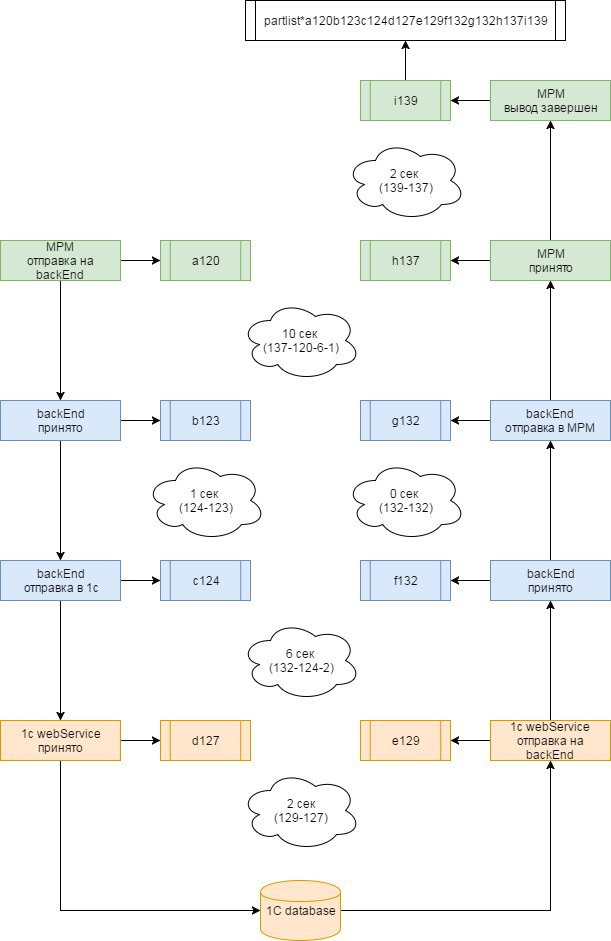

In [9]:
'''
df['time_de']=df.e-df.d # 1C webService -> 1C database -> 1C webService
df['time_cf']=df.f-df.c-df.time_de # Backend -> 1c webService -> Backend
df['time_bg']=df.g-df.b-df.time_de-df.time_cf # Backend -> Backend
df['time_ah']=df.h-df.a-df.time_de-df.time_cf-df.time_bg # Device -> Device
df['time_hi']=df.i-df.h # Device caclulation
'''
df['inside_1c']     =df.e-df.d # 1C webService -> 1C database -> 1C webService
df['backend_1c']    =df.f-df.c-df.inside_1c # Backend -> 1c webService -> Backend
df['inside_backend']=df.g-df.b-df.inside_1c-df.backend_1c # Backend -> Backend
df['device_backend']=df.h-df.a-df.inside_1c-df.backend_1c-df.inside_backend # Device -> Device
df['inside_device']=df.i-df.h # Device caclulation

report(df)

id : 14781131
date : 17.07.2020 8:00:37
Hour : 8
Minute : 0.0
second : 37.0
phone : 9164375204
ttl : bidlist*a1594962030521b1594962034167c1594962034167d1594972834850e1594972836084f1594962037037g1594962037037h1594962035534i1594962035576j1594972837053
dev_len : 5055
func : bidlist
a : 1594962030.521
b : 1594962034.167
c : 1594962034.167
d : 1594972834.85
e : 1594972836.084
f : 1594962037.037
g : 1594962037.037
h : 1594962035.534
i : 1594962035.576
j : 1594972837.053
inside_1c : 1.2340002059936523
backend_1c : 1.6359996795654297
inside_backend : 0.0
device_backend : 2.1430001258850098
inside_device : 0.04200005531311035


#### Удалим временные колонки

In [10]:
df.drop(['a','b','c','d','e','f','g','h','i','j'], axis='columns', inplace=True)

In [11]:
report(df)

id : 14781131
date : 17.07.2020 8:00:37
Hour : 8
Minute : 0.0
second : 37.0
phone : 9164375204
ttl : bidlist*a1594962030521b1594962034167c1594962034167d1594972834850e1594972836084f1594962037037g1594962037037h1594962035534i1594962035576j1594972837053
dev_len : 5055
func : bidlist
inside_1c : 1.2340002059936523
backend_1c : 1.6359996795654297
inside_backend : 0.0
device_backend : 2.1430001258850098
inside_device : 0.04200005531311035


In [12]:
df[df.func=='bidlist']

,id,date,Hour,Minute,second,phone,ttl,dev_len,func,inside_1c,backend_1c,inside_backend,device_backend,inside_device
0,14781131,17.07.2020 8:00:37,8,0.0,37.0,9164375204,bidlist*a1594962030521b1594962034167c159496203...,5055,bidlist,1.234,1.636,0.0,2.143,0.042
2,14781224,17.07.2020 8:01:54,8,1.0,54.0,9164375204,bidlist*a1594962109037b1594962110639c159496211...,4119,bidlist,2.843,1.073,0.0,0.162,0.041
6,14782145,17.07.2020 8:09:57,8,9.0,57.0,9164375204,bidlist*a1594962594176b1594962596215c159496259...,1804,bidlist,1.094,0.139,0.0,0.539,0.032
7,14782149,17.07.2020 8:10:04,8,10.0,4.0,9164375204,bidlist*a1594962599221b1594962600833c159496260...,3964,bidlist,3.625,0.135,0.0,0.152,0.052
8,14783173,17.07.2020 8:53:40,8,53.0,40.0,9164375204,bidlist*a1594965201729b1594965203487c159496520...,16880,bidlist,15.922,0.655,0.0,0.252,0.051
9,14783175,17.07.2020 8:53:43,8,53.0,43.0,9164375204,bidlist*a1594965204924b1594965206545c159496520...,16605,bidlist,16.266,0.137,0.0,0.156,0.046
10,14783176,17.07.2020 8:53:46,8,53.0,46.0,9164375204,bidlist*a1594965218851b1594965220469c159496522...,5790,bidlist,5.141,0.270,0.0,0.328,0.051
12,14783179,17.07.2020 8:53:52,8,53.0,52.0,9164375204,bidlist*a1594965220971b1594965222605c159496522...,10038,bidlist,9.312,0.402,0.0,0.261,0.063
14,14783489,17.07.2020 9:02:16,9,2.0,16.0,9164375204,bidlist*a1594965733467b1594965735051c159496573...,1707,bidlist,1.485,0.122,0.0,0.074,0.026
15,14784934,17.07.2020 10:01:48,10,1.0,48.0,9164375204,bidlist*a1594969304664b1594969306394c159496930...,1854,bidlist,1.406,0.169,0.0,0.236,0.043


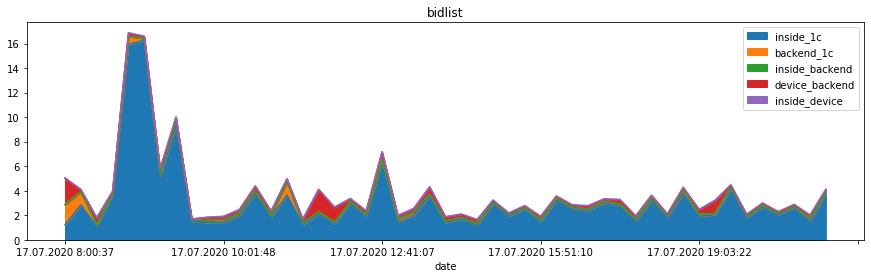

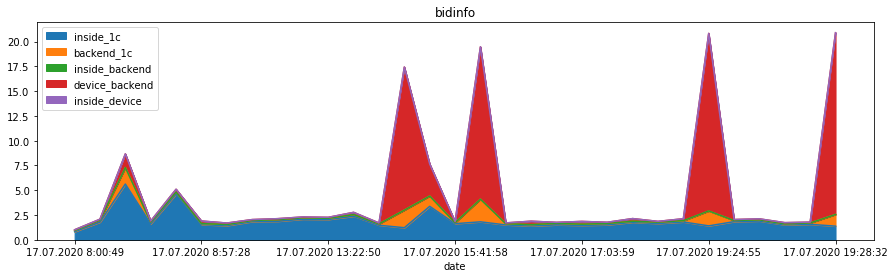

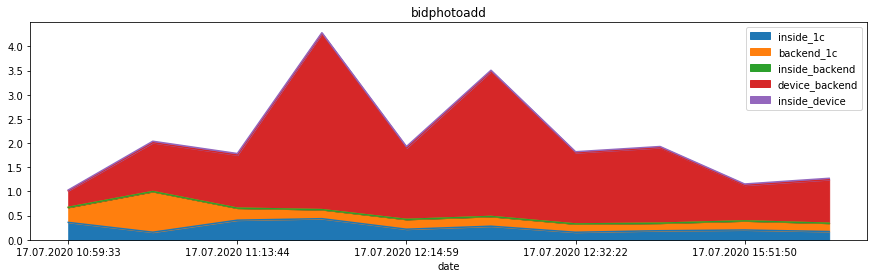

In [25]:
for func in df['func'].unique():
    df[df.func==func].plot(
        kind='area',
        x='date',
        #y=['time_de','time_cf','time_bg','time_ah','time_hi'],
        y=['inside_1c','backend_1c','inside_backend','device_backend','inside_device'],
        title = func,
        #subplots=True,
        figsize=(15,4)
    )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc93a343a50>,
      dtype=object)

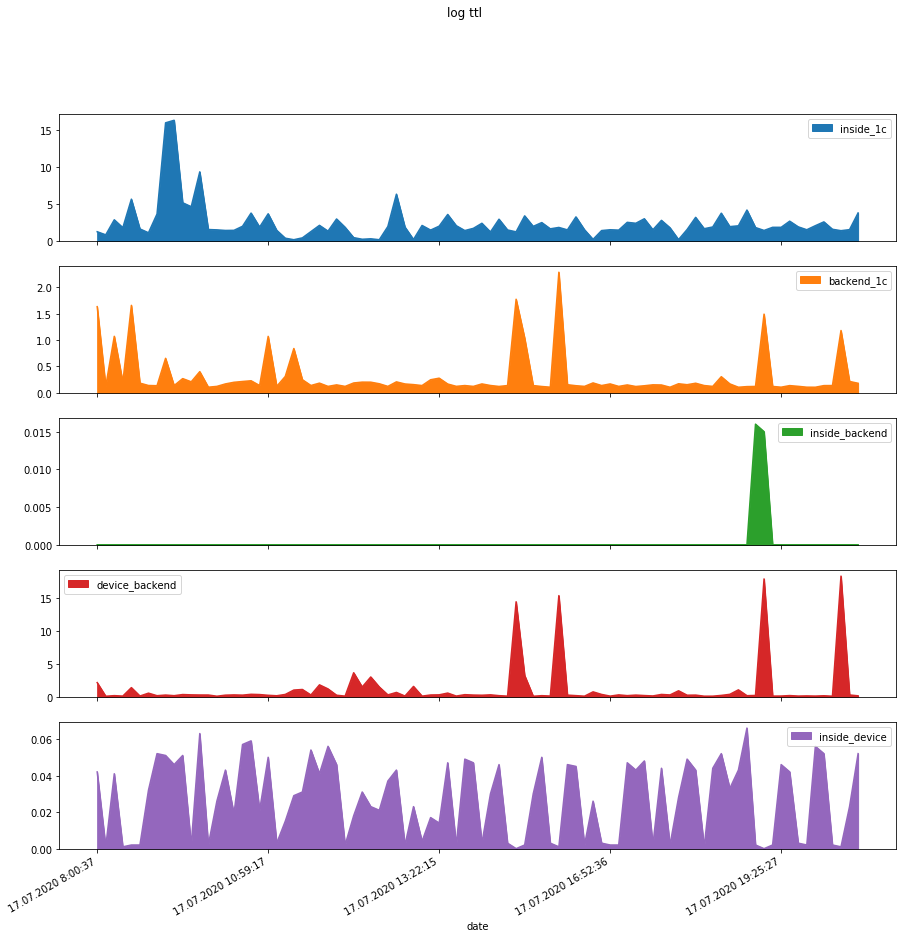

In [18]:
#df.groupby(['date']).size().unstack().plot(kind='bar',stacked=True)
#plt.show()

df.plot(
    kind='area',
    x='date',
    #y=['time_de','time_cf','time_bg','time_ah','time_hi'],
    y=['inside_1c','backend_1c','inside_backend','device_backend','inside_device'],
    title = 'log ttl',
    #subplots=True,
    figsize=(15,15)
)

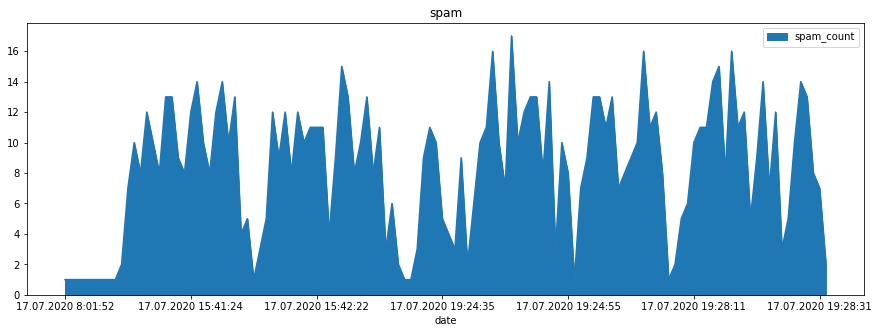

In [16]:
spam.plot(
    kind='area',
    x='date',
    y=['spam_count'],
    title = 'spam',
    figsize=(15,5)
)